# Diffusion du xénon dans le combustible nucléaire

Projet informatique, Alice PELOSSE & Clément PRAUD

## Modélisation d’un déplacement aléatoire d’atomes
Il s'agit de notre première étape, nécesaire avant de prendre en compte l'interaction avec la matrice de Zirconium et l'interaction entre atomes de Xénon.

Nous pensons gérer le problème avec des listes, chacune asociée à un type de particule. Les listes ont l'avantage par rapport aux array de numpy d'être de tailles varaibles et d'ainsi permettre à notre nombre d'entités pour chaque espèce de varier.
Ainsi, il nous faut générer 4 tableaux indépendants modélisant les atomes présents (Zr, O, C et Xe).
Pour chaque atomes on connait sa position (i,j) correspondant à la ligne et à la colonne dans la matrice.

A titre d'exemple, appeler Xe[10] retournera les coordonnées de l'atome 11 de Xénon (en convention de numérotation Python).

### Déplacement du Xénon

Pour un atome donné Xe on a une probabilité $P$ 
de se déplacer selon une des 9 directions (la 9eme étant on reste sur place).

Pour l'échelle de temps de diffusion, il faut regarder l'équation de diffusion. Nous pourrons ainsi, à l'aide des paramètres initiaux eterminer la longueur interessante pour la modélisation.

Pour la mise à jour de la position des atomes, on prend de manière aléatoire un atome dans le tableau Xe (fonction random) : en effet, il n'y a aucune raison de parcourir la liste dans l'ordre !

Dans un premiere temps, on ne tiendra pas compte du problème de superposition de deux atomes de Xénon,    

[6 6]
[2 1]


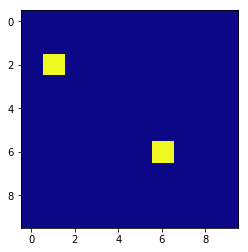

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint


#Déclaration des varaibles


L=10                  #Taile de la matrice 
N=2                   #Nombres de particules initialement 
Nbre_Etapes=10       #Nombres d'instants dans l'expérience


def distribution_initiale_Xenon(N,L):
    """
    Retourne la position des N particules présentes à l'état initial dans la matrice de taille NxN
    La distribution des position est aléatoire.
    Deux atomes peuvent être au même endroit.
    
    Exemple :
        
    >>> distribution_initiale_Xenon(2,10)
    [array([0, 5]), array([6, 2])]

    """
    n=[0]*N
    for i in range(N):
        n[i]=np.array([randint(0,L-1),randint(0,L-1)])
    return n
    
Xe=distribution_initiale_Xenon(N,L)

M=np.zeros((L,L))

for i in range(N):
    p=Xe[i]
    print(p)
    M[p[0]][p[1]] =1
    
plt.imshow(M,cmap='plasma')
plt.show()

### Création et désintégration du Xénon,
Dans la liste des atomes de Xénon on en lève et ajoute des atomes selon la loi de désintégration de l'iode et de l'uranium et celle du xénon.